In [51]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


### 1. Importing Libraries and Data preprocessing

In [54]:
# import necessary libraries
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
# !unzip /content/drive/My\ Drive/Dataset.zip

In [30]:
# set seed
seed = 42

In [31]:
# load csv file
data = pd.read_csv('emergency_classification.csv')

In [32]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [33]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)

X_train: (1646, 224, 224, 3) X_valid: (706, 224, 224, 3)
y_train: (1646,) y_valid: (706,)


## Image Augmentation using Keras (ImageDataGenerator)

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40, 
                              horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [62]:
image_augmentation.fit(X_train)

### 2. Model Building

In [63]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [64]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [65]:
# defining and compiling the model architecture
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [67]:
# fits the model on batches with real-time data augmentation:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)

AttributeError: 'Sequential' object has no attribute 'fit_generator'

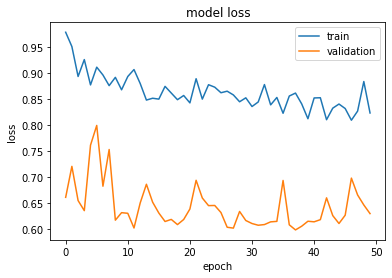

In [0]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

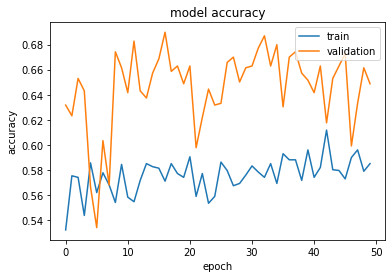

In [0]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
print('Training Accuracy: ', accuracy_score(y_train, model.predict_classes(X_train)[:,0]))
print('\nValidation Accuracy: ', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]))

Training Accuracy:  0.6743620899149453

Validation Accuracy:  0.6487252124645893
